# Setting the path for spark

In [1]:
import os

Spark_ARGS = "--packages databricks:spark-deep-learning:1.0.0-spark2.3-s_2.11 pyspark-shell"

#Installing pySpark 
and importing corresponding libs

In [2]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 26 kB/s 
     |████████████████████████████████| 198 kB 51.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=e9f98c22d5d04057c4c7289b2f15dd25f1547f72c7b658c81bd1ec6249f87e59
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [3]:
#Import PySpark libraries
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext


spark = SparkSession.builder.appName('SparkNet:Covid_Image_Classification').getOrCreate()
spark


In [4]:
import sys, glob, os
sys.path.extend(glob.glob(os.path.join(os.path.expanduser("~"), ".ivy2/jars/*.jar")))

from pyspark.ml.image import ImageSchema
from pyspark.sql.functions import lit

In [6]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

#Import the libs

In [7]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

#Upload the kaagle json file to download the data base

In [11]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mallikharjunaraos","key":"feea3c228d556fcdd1c9cad76572ed4b"}'}

In [8]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

#Download the database

In [12]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

 99% 569M/572M [00:04<00:00, 105MB/s] 
100% 572M/572M [00:04<00:00, 143MB/s]


#Unzip the images

In [13]:
!unzip \*.zip

Archive:  covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.pn

# Exploring the directories

In [14]:
for dirpath,dirnames,filenames in os.walk("/content/COVID_IEEE"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in '/content/COVID_IEEE'.
there are 0 directories and 668 images in '/content/COVID_IEEE/normal'.
there are 0 directories and 619 images in '/content/COVID_IEEE/virus'.
there are 0 directories and 536 images in '/content/COVID_IEEE/covid'.


In [15]:
data_dir = pathlib.Path("/content/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

#Creating data frames using spark

In [16]:
virus_df = spark.read.format("image").load("COVID_IEEE/virus")
normal_df = spark.read.format("image").load("COVID_IEEE/normal")
covid_df = spark.read.format("image").load("COVID_IEEE/covid")

# Plotting the x ray images 

In [17]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")
    
    return img

['person1247_virus_2115.jpeg']
image shape (808, 1232)


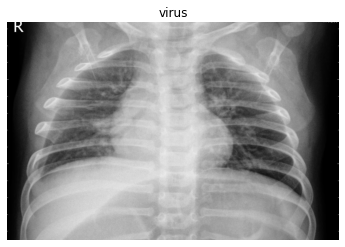

In [18]:
img = view_image("/content/COVID_IEEE/","virus")

['IM-0127-0001.jpeg']
image shape (1306, 1974)


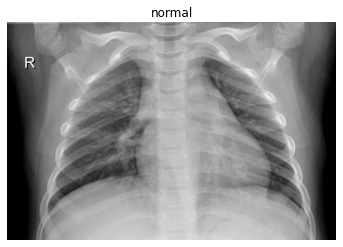

In [ ]:
img = view_image("/content/COVID_IEEE/","normal")

['case14_xray_1.jpeg']
image shape (1024, 1007, 3)


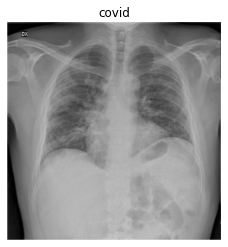

In [ ]:
img = view_image("/content/COVID_IEEE/","covid")

In [ ]:
data=[]
labels=[]
covid=os.listdir("/content/COVID_IEEE/covid/")
for a in covid:

    image = cv2.imread("/content/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [ ]:
normal=os.listdir("/content/COVID_IEEE/normal/")
for a in normal:

    image = cv2.imread("/content/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224))



    data.append(image)
    labels.append(1)

In [ ]:
virus=os.listdir("/content/COVID_IEEE/virus/")
for a in virus:

    image = cv2.imread("/content/COVID_IEEE/virus/"+a,)
    image = cv2.resize(image, (224, 224))
    

    data.append(image)
    labels.append(2)

In [ ]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

# Train and test split for 3 categories

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Building the neural network

In [ ]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                        

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 363s 11s/step - loss: 0.7345 - accuracy: 0.6676 - val_loss: 0.3464 - val_accuracy: 0.8699
Epoch 2/15
32/32 [==============================] - 421s 13s/step - loss: 0.3512 - accuracy: 0.8843 - val_loss: 0.3174 - val_accuracy: 0.9110
Epoch 3/15
32/32 [==============================] - 359s 11s/step - loss: 0.2721 - accuracy: 0.9059 - val_loss: 0.1859 - val_accuracy: 0.9315
Epoch 4/15
32/32 [==============================] - 353s 11s/step - loss: 0.1815 - accuracy: 0.9392 - val_loss: 0.2113 - val_accuracy: 0.9155
Epoch 5/15
32/32 [==============================] - 353s 11s/step - loss: 0.1305 - accuracy: 0.9510 - val_loss: 0.2660 - val_accuracy: 0.8881
Epoch 6/15
32/32 [==============================] - 353s 11s/step - loss: 0.1705 - accuracy: 0.9392 - val_loss: 0.2559 - val_accuracy: 0.9110
Epoch 7/15
32/32 [==============================] - 353s 11s/step - loss: 0.0945 - accuracy: 0.9696 - val_loss: 0.1703 - val_accuracy: 0.9475
Epoch 

# Plotting the loss values

Text(0.5, 1.0, 'Training-Validation Accuracy')

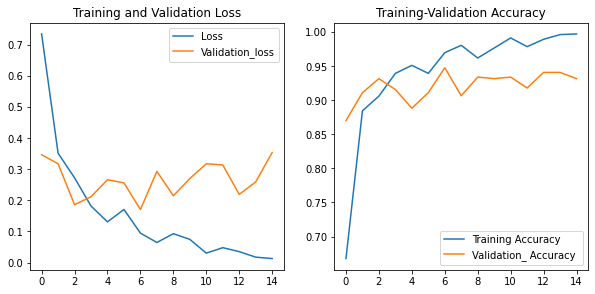

In [ ]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [ ]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

# Accuracy values

In [ ]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.91      0.98      0.94       129
           2       0.98      0.91      0.95       128

    accuracy                           0.96       365
   macro avg       0.96      0.96      0.96       365
weighted avg       0.96      0.96      0.96       365



In [ ]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,106,2,0
normal,1,126,2
virus,1,10,117


# Mobilenet Keras

In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in base_model.layers:
  layer.trainable =False

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)

prediction_layer = Dense(units=3, activation="softmax")(model)

In [ ]:
model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 64s 2s/step - loss: 8.0757 - accuracy: 0.7892 - val_loss: 3.1560 - val_accuracy: 0.8995
Epoch 2/15
32/32 [==============================] - 58s 2s/step - loss: 1.5681 - accuracy: 0.9373 - val_loss: 1.0054 - val_accuracy: 0.9566
Epoch 3/15
32/32 [==============================] - 59s 2s/step - loss: 0.1669 - accuracy: 0.9873 - val_loss: 0.4682 - val_accuracy: 0.9475
Epoch 4/15
32/32 [==============================] - 58s 2s/step - loss: 0.0936 - accuracy: 0.9922 - val_loss: 0.5481 - val_accuracy: 0.9635
Epoch 5/15
32/32 [==============================] - 60s 2s/step - loss: 0.0833 - accuracy: 0.9941 - val_loss: 0.2838 - val_accuracy: 0.9680
Epoch 6/15
32/32 [==============================] - 59s 2s/step - loss: 0.1771 - accuracy: 0.9824 - val_loss: 0.9478 - val_accuracy: 0.9406
Epoch 7/15
32/32 [==============================] - 59s 2s/step - loss: 0.1243 - accuracy: 0.9882 - val_loss: 0.8115 - val_accuracy: 0.9635
Epoch 8/15
32/32 [==

Text(0.5, 1.0, 'Training-Validation Accuracy')

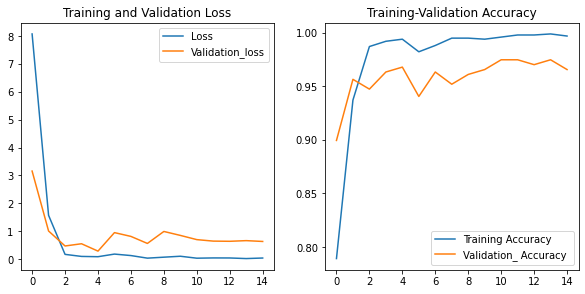

In [ ]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [ ]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

# Accuracy values table

In [ ]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       108
           1       0.96      0.98      0.97       129
           2       0.95      0.97      0.96       128

    accuracy                           0.97       365
   macro avg       0.97      0.97      0.97       365
weighted avg       0.97      0.97      0.97       365



In [ ]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,102,1,5
normal,0,127,2
virus,0,4,124
